In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [85]:
movies_df = pd.read_csv('MoviesOnStreamingPlatforms.csv')
movies_df=movies_df.iloc[:, 1:].set_index('ID')
movies_df.head()

,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,
1,The Irishman,2019,18+,98/100,1,0,0,0,0
2,Dangal,2016,7+,97/100,1,0,0,0,0
3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
5,Roma,2018,18+,94/100,1,0,0,0,0


In [86]:
# Iterate through each row
#   if Netflix == 1 then platform = 'Netflix'

movies_df['Streaming platform']=''
for each_platform in ['Netflix', 'Hulu', 'Prime Video', 'Disney+']: 
    movies_df.loc[movies_df[each_platform]==1, 'Streaming platform']=each_platform

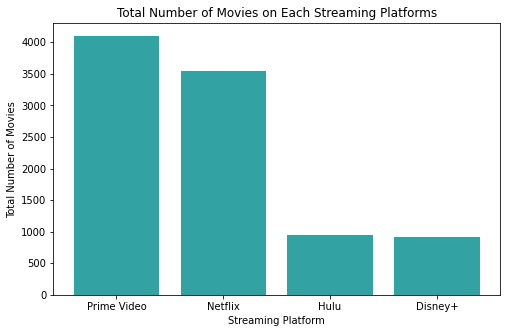

In [87]:
movies_df['Streaming platform'].value_counts()
Highest_number_of_movies_df = movies_df['Streaming platform'].value_counts().rename_axis('Streaming platform').reset_index(name='Counts')
fig= plt.figure(figsize=(8,5))
plt.bar(Highest_number_of_movies_df['Streaming platform'], Highest_number_of_movies_df['Counts'],  
       alpha=0.8, 
       color='darkcyan')
plt.xlabel('Streaming Platform')
plt.ylabel('Total Number of Movies')
plt.title('Total Number of Movies on Each Streaming Platforms')
plt.show()

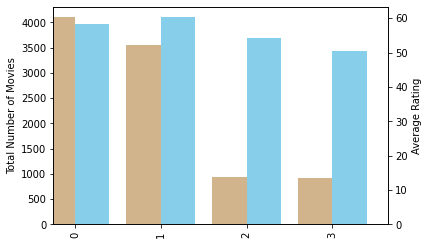

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

Highest_number_of_movies_df.Counts.plot(kind='bar', color='tan', ax=ax, width=width, position=1)
average_rating.Rating.plot(kind='bar', color='skyblue', ax=ax2, width=width, position=0)

ax.set_ylabel('Total Number of Movies')
ax2.set_ylabel('Average Rating')
#plt.xticks(Highest_number_of_movies_df['Streaming platform'])
plt.show()

#### Next we look for the Streaming platform that provides the highest number of critically acclaimed movies.


In [89]:
#Split Rotten Tomatoes column in to two different cells.
data=movies_df['Rotten Tomatoes'].str.split('/', expand=True)

In [118]:
#Add the split value into a new column called rating and convert the values to float.
movies_df['Rating']=pd.to_numeric(data[0])
movies_df.head()


,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Streaming platform,Rating
ID,,,,,,,,,,,
1,The Irishman,2019,18+,98/100,1,0,0,0,0,Netflix,98.0
2,Dangal,2016,7+,97/100,1,0,0,0,0,Netflix,97.0
3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0,Netflix,95.0
4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0,Netflix,94.0
5,Roma,2018,18+,94/100,1,0,0,0,0,Netflix,94.0


In [119]:
#Clean data set by dropping uneccessary rows.
clean_movies_df=movies_df.drop(columns=['Netflix', 'Hulu', 'Prime Video', 'Disney+','Rotten Tomatoes', 'Type'])
clean_movies_df.head()

,Title,Year,Age,Streaming platform,Rating
ID,,,,,
1,The Irishman,2019,18+,Netflix,98.0
2,Dangal,2016,7+,Netflix,97.0
3,David Attenborough: A Life on Our Planet,2020,7+,Netflix,95.0
4,Lagaan: Once Upon a Time in India,2001,7+,Netflix,94.0
5,Roma,2018,18+,Netflix,94.0


In [120]:
#Group by streaming platform on Rating and find the average.
movies_df_groupby=clean_movies_df.groupby(["Rating"])
average_rating=movies_df_groupby.count("Streaming platform")
average_rating.sort_values(by=["Rating"],ascending=False)
average_rating.reset_index(inplace=True)

TypeError: count() takes 1 positional argument but 2 were given

In [46]:
average_rating

,Streaming platform,Rating
0,Disney+,58.312364
1,Hulu,60.262990
2,Netflix,54.179509
3,Prime Video,50.379512


The streaming paltform that has the highest average rating for movies is Hulu.

In [114]:
#group by mean to see which platform offers the most recent movies based on average
recent_movies=movies_df_groupby.mean()
recent_movies

,Year,Rating
Streaming platform,,
Disney+,1997.033623,58.312364
Hulu,2012.236479,60.262990
Netflix,2014.950704,54.179509
Prime Video,2002.132927,50.379512


On average we can see that Hulu offers more recent movies than any other platform.

#### Which platform offers movies for a specific age group?

In [94]:
#split age to convert it to float
age_split=clean_movies_df['Age'].str.split('+', expand=True)
age_split 

,0,1
ID,,
1,18,
2,7,
3,7,
4,7,
5,18,
...,...,...
9511,NaN,NaN
9512,NaN,NaN
9513,NaN,NaN


In [95]:
#drop nan values since they are empty values
clean_movies_df['Age']=age_split[0]
drop_nan= clean_movies_df.dropna(subset=['Age'])
drop_nan.loc[drop_nan['Age']=='all','Age']=0
drop_nan['Age']=pd.to_numeric(drop_nan['Age'])
drop_nan

<ipython-input-95-cdd89bd6d8f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_nan['Age']=pd.to_numeric(drop_nan['Age'])


,Title,Year,Age,Streaming platform,Rating
ID,,,,,
1,The Irishman,2019,18,Netflix,98.0
2,Dangal,2016,7,Netflix,97.0
3,David Attenborough: A Life on Our Planet,2020,7,Netflix,95.0
4,Lagaan: Once Upon a Time in India,2001,7,Netflix,94.0
5,Roma,2018,18,Netflix,94.0
...,...,...,...,...,...
9504,Disney My Music Story: Sukima Switch,2021,16,Disney+,16.0
9506,Great Shark Chow Down,2019,7,Disney+,14.0
9508,Texas Storm Squad,2020,13,Disney+,14.0


In [96]:
#Group the dataframe by age and streaming platform to review the difference

Age_groupby=drop_nan.groupby(["Age","Streaming platform"])
age_count=Age_groupby.count()
age_streaming=age_count.pivot_table(values='Title', index='Age', columns='Streaming platform')
age_streaming.reset_index(inplace=True)
age_streaming.columns.name=None
age_streaming



,Age,Disney+,Hulu,Netflix,Prime Video
0,0,370,33,139,156
1,7,278,88,304,420
2,13,70,161,372,395
3,16,4,26,149,97
4,18,3,342,842,1089


In [111]:
#define a function to plot the graph
def age_plot(df,name,color):
    plt.plot(df['Age'], df[name],
            c=color, 
             marker="o",
            alpha=0.8, label=name)

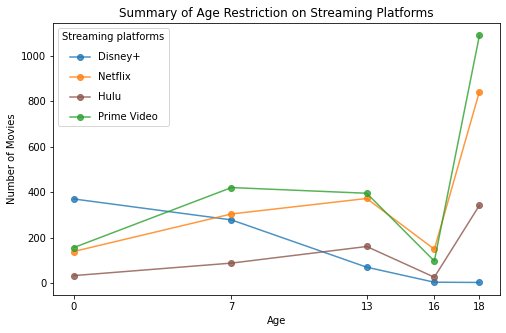

In [112]:
#plot graph for each streaming platform based on Age
fig= plt.figure(figsize=(8,5))
age_plot(age_streaming, 'Disney+', 'C0')
age_plot(age_streaming, 'Netflix', 'C1')
age_plot(age_streaming, 'Hulu', 'C5')
age_plot(age_streaming, 'Prime Video', 'C2')

#Add legend
lgnd = plt.legend(fontsize="medium", 
                  loc="best", title="Streaming platforms",
                  labelspacing=1)

#Add axis labels
plt.xticks(age_streaming['Age'].values)
plt.xlabel('Age')
plt.ylabel('Number of Movies')
plt.title('Summary of Age Restriction on Streaming Platforms')
plt.show()

From the graph we can see that Disney caters more to younger people below the age of 7 as compared to the others while Netflix and Prime Video cater significantly to people above the age of 18.

In [1]:
filtered_df=movies_df[movies_df['Year']>=2000]
fig=plt.figure(figsize=(10,8))
ay = sns.relplot(x=filtered_df['Year'], y=Year['Title'], hue= Year['Streaming platform'])
plt.show() 

NameError: name 'movies_df' is not defined